<!--NAVIGATION-->
< [Simulating a Model](02.05-Simulating-a-Model.ipynb) | [Contents](Index.ipynb) | [Plotting Simulation Results](02.07-Plotting-Simulation-Results.ipynb) >

# Retrieving Simulation Results

EnergyPlus simulation results can be seen in two forms: the first is the html report wich contains summarized information about the model. The second is the timeseries that are  exported to cvs filed thanks to the ReadVarsESO postprocessing program. While these options are useful from the perspective of a use of the EP-Lauch, they cannot be scripted easily.  

A third less known output format is the SQLite database. This single file is generated at the end of a simlaton and contains all the information going into the HTML file as well as any timeseries. Moreover, the database contains a lot more metadata points such as units and timesteps of each timeseries datapoint.

`archetypal` leverages the SQLite results file to eaisly access simulation results.

First, let's load the same model we used in the provious section and call `simulate` to make sure we have simulated the model. Remember that if the model has already been simulated, the call to `simulate` will be quick. Optionnaly, we can set `readvars` as `False` and gain a little bit of permormance because none of the csv files will be generated.

In [4]:
from archetypal import IDF

idf = IDF(
    "data/seed_file_V960.idf",
    epw="data/USA_CA_Chino.AP.722899_TMYx.epw",
    readvars=False,  # readvars=False, will make the simulation faster
)

In [5]:
idf.simulate()

<IDF object seed_file_V960.idf
at data/seed_file_V960.idf
	Version 9.6.0
Simulation Info:
| SimulationIndex       | 1                                                          |
| EnergyPlusVersion     | EnergyPlus, Version 9.6.0-f420c06a69, YMD=2024.02.02 11:34 |
| TimeStamp             | YMD=2024.02.02 11:34                                       |
| NumTimestepsPerHour   | 6                                                          |
| Completed             | FALSE                                                      |
| CompletedSuccessfully | FALSE                                                      |
	Files at 'cache/01bd250dc35990d1188a78913af9e733/03359125d36653f54d6edc0a478d92be'>

## Getting an OutputMeter

In [6]:
idf.meters.OutputMeter.DistrictHeating__Facility.values(units="kWh")

/Applications/EnergyPlus-9-6-0/ExpandObjects #0-seed_file_V960.idf: 0.00it [00:00, ?it/s]

/Applications/EnergyPlus-9-6-0/energyplus seed_file_V960.idf: 0it [00:00, ?it/s]

2018-01-01 00:00:00    49.645264
2018-01-01 01:00:00    50.883045
2018-01-01 02:00:00    50.933107
2018-01-01 03:00:00    50.932056
2018-01-01 04:00:00    50.931552
                         ...    
2018-12-31 19:00:00    17.022844
2018-12-31 20:00:00    18.033533
2018-12-31 21:00:00    20.859710
2018-12-31 22:00:00    30.458999
2018-12-31 23:00:00    34.000411
Name: DistrictHeating:Facility, Length: 8760, dtype: float64, units:kWh

Once an OutputMeter has been retreived, it is no longer necessary to simulate the model again. That same meter can be retrieved in subsequent calls. For instace, we will assign the the timeseires to the variable `ds_heating`:

In [7]:
ds_heating = idf.meters.OutputMeter.DistrictHeating__Facility.values(units="kWh")

# Plotting OutputMeters and OutputVariables



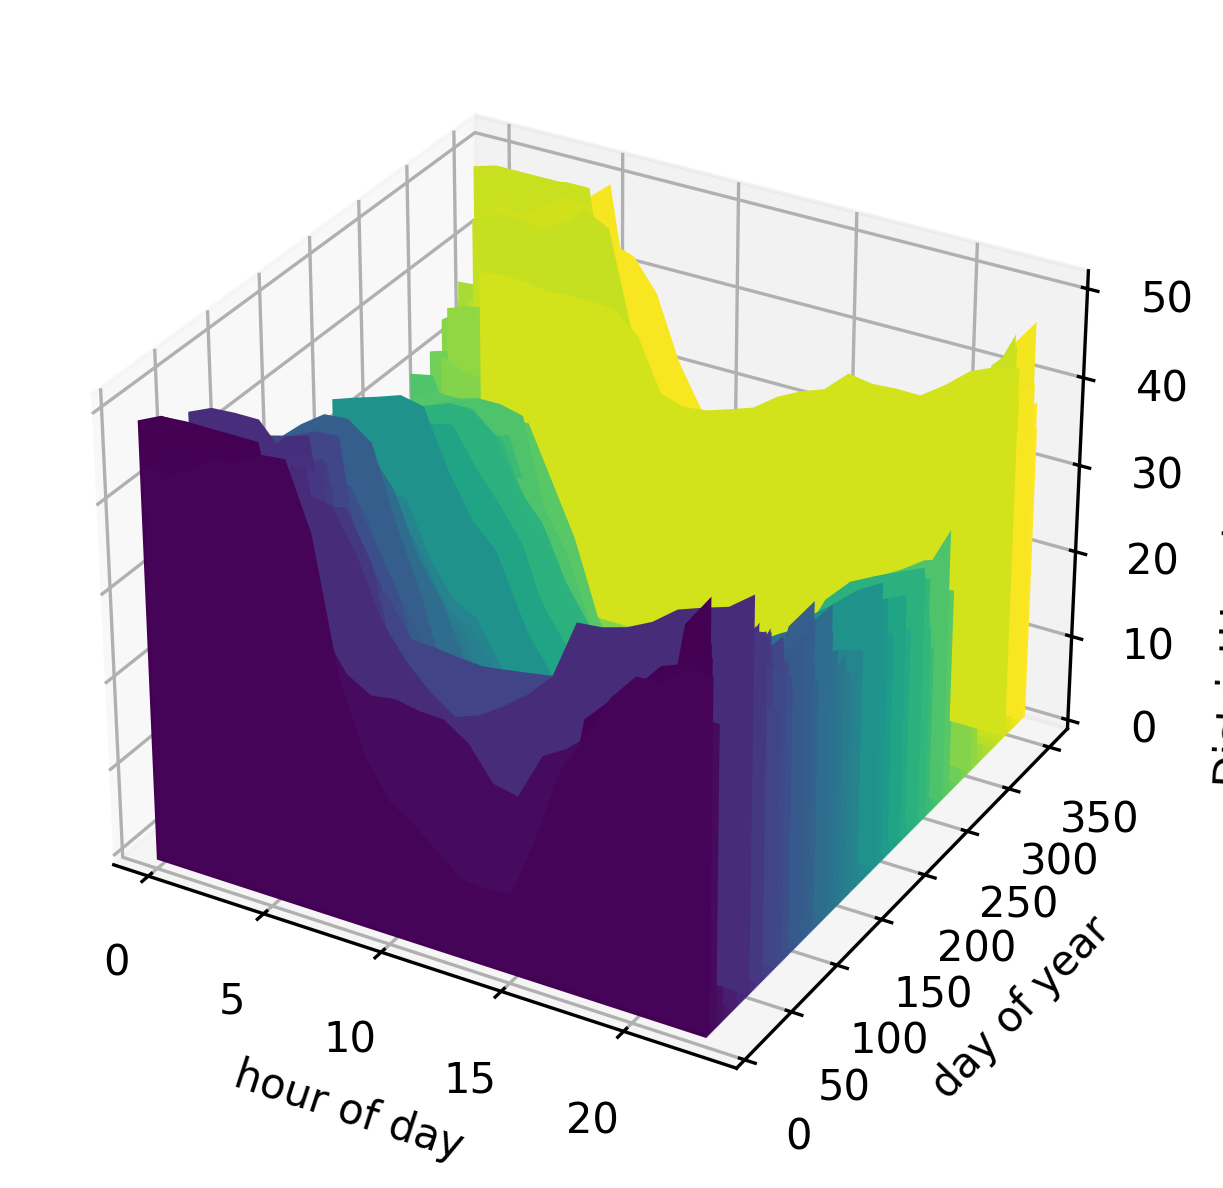

(<Figure size 1920x1440 with 1 Axes>,
 [<Axes3D: xlabel='hour of day', ylabel='day of year', zlabel='DistrictHeating:Facility [kWh]'>])

In [8]:
ds_heating.plot3d(axis_off=False)

<!--NAVIGATION-->
< [Simulating a Model](02.05-Simulating-a-Model.ipynb) | [Contents](Index.ipynb) | [Plotting Simulation Results](02.07-Plotting-Simulation-Results.ipynb) >